# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Data Preprocessing
## 1. Loading the Data


In [3]:
data = pd.read_excel('movies.xls')
data

,Title,Year,Genres,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,IMDB_Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,123.0,385907.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,110.0,100000.0,5,1.0,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,151.0,245000.0,4849,45.0,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,145.0,6000000.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,110.0,NaN,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...
5035,War & Peace,1956,Drama|History|Romance|War,NaN,NaN,9277,44.0,10.0,8.2
5036,Wings,2012,Comedy|Drama,30.0,NaN,7646,56.0,19.0,7.3
5037,Wolf Creek,2005,Drama|Horror|Thriller,NaN,NaN,726,6.0,2.0,7.1
5038,Wuthering Heights,2011,Drama|Romance,142.0,NaN,6053,33.0,9.0,7.7


In [7]:
data.head()

,Title,Year,Genres,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,IMDB_Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,123.0,385907.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,110.0,100000.0,5,1.0,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,151.0,245000.0,4849,45.0,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,145.0,6000000.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,110.0,NaN,7431,84.0,71.0,8.0


# 2. Analyzing the Data Set

In [8]:
data.dtypes

Title                  object
Year                    int64
Genres                 object
Duration              float64
Budget                float64
User_votes              int64
Reviews_by_Users      float64
Reviews_by_Crtiics    float64
IMDB_Score            float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 9 columns):
Title                 5040 non-null object
Year                  5040 non-null int64
Genres                5040 non-null object
Duration              5026 non-null float64
Budget                4551 non-null float64
User_votes            5040 non-null int64
Reviews_by_Users      5020 non-null float64
Reviews_by_Crtiics    4991 non-null float64
IMDB_Score            5040 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 315.1+ KB


In [7]:
data.describe()

,Year,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,IMDB_Score
count,5040.000000,5026.000000,4.551000e+03,5.040000e+03,5020.000000,4991.000000,5040.000000
mean,2002.493254,107.220852,3.975262e+07,8.371470e+04,272.862749,140.238028,6.441270
std,12.472822,25.182885,2.061149e+08,1.385133e+05,378.030097,121.605589,1.124691
min,1916.000000,7.000000,2.180000e+02,5.000000e+00,1.000000,1.000000,1.600000
25%,1999.000000,93.000000,6.000000e+06,8.601750e+03,65.000000,50.000000,5.800000
50%,2005.000000,103.000000,2.000000e+07,3.440500e+04,156.000000,110.000000,6.600000
75%,2011.000000,118.000000,4.500000e+07,9.639125e+04,326.000000,195.000000,7.200000
max,2020.000000,511.000000,1.221550e+10,1.689764e+06,5060.000000,813.000000,9.500000


## 3. Analysing various Genres

In [8]:
genres = data['Genres']
genres.head()

0      Drama|History|War
1            Crime|Drama
2      Drama|Romance|War
3           Drama|Sci-Fi
4    Crime|Drama|Romance
Name: Genres, dtype: object

In [9]:
genre_list = ""
for index,row in data.iterrows():
        genre_list += row.Genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Musical',
 'Film-Noir',
 'Action',
 'Western',
 'Drama',
 'Family',
 'Game-Show',
 'Romance',
 'Fantasy',
 'Horror',
 'Sport',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Mystery',
 'Reality-TV',
 'News',
 'War',
 'Documentary',
 'Thriller',
 'Short',
 'Crime',
 'Music',
 'Biography',
 'Animation',
 'History']

In [12]:
#Enriching the movies dataset by adding the various genres columns.
movies_with_genres = data.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.Genres), axis = 1)

In [13]:
dataset=movies_with_genres

In [14]:
dataset.head()

,Title,Year,Genres,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,IMDB_Score,Musical,...,News,War,Documentary,Thriller,Short,Crime,Music,Biography,Animation,History
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,123.0,385907.0,10718,88.0,69.0,8.0,0,...,0,1,0,0,0,0,0,0,0,1
1,Over the Hill to the Poorhouse,1920,Crime|Drama,110.0,100000.0,5,1.0,1.0,4.8,0,...,0,0,0,0,0,1,0,0,0,0
2,The Big Parade,1925,Drama|Romance|War,151.0,245000.0,4849,45.0,48.0,8.3,0,...,0,1,0,0,0,0,0,0,0,0
3,Metropolis,1927,Drama|Sci-Fi,145.0,6000000.0,111841,413.0,260.0,8.3,0,...,0,0,0,0,0,0,0,0,0,0
4,Pandora's Box,1929,Crime|Drama|Romance,110.0,NaN,7431,84.0,71.0,8.0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
dataset.count()

Title                 5040
Year                  5040
Genres                5040
Duration              5026
Budget                4551
User_votes            5040
Reviews_by_Users      5020
Reviews_by_Crtiics    4991
IMDB_Score            5040
Musical               5040
Film-Noir             5040
Action                5040
Western               5040
Drama                 5040
Family                5040
Game-Show             5040
Romance               5040
Fantasy               5040
Horror                5040
Sport                 5040
Adventure             5040
Sci-Fi                5040
Comedy                5040
Mystery               5040
Reality-TV            5040
News                  5040
War                   5040
Documentary           5040
Thriller              5040
Short                 5040
Crime                 5040
Music                 5040
Biography             5040
Animation             5040
History               5040
dtype: int64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 35 columns):
Title                 5040 non-null object
Year                  5040 non-null int64
Genres                5040 non-null object
Duration              5026 non-null float64
Budget                4551 non-null float64
User_votes            5040 non-null int64
Reviews_by_Users      5020 non-null float64
Reviews_by_Crtiics    4991 non-null float64
IMDB_Score            5040 non-null float64
Musical               5040 non-null int64
Film-Noir             5040 non-null int64
Action                5040 non-null int64
Western               5040 non-null int64
Drama                 5040 non-null int64
Family                5040 non-null int64
Game-Show             5040 non-null int64
Romance               5040 non-null int64
Fantasy               5040 non-null int64
Horror                5040 non-null int64
Sport                 5040 non-null int64
Adventure             5040 non-null int64

# 4. Checking for Null Values

In [17]:
dataset.isnull().sum()

Title                   0
Year                    0
Genres                  0
Duration               14
Budget                489
User_votes              0
Reviews_by_Users       20
Reviews_by_Crtiics     49
IMDB_Score              0
Musical                 0
Film-Noir               0
Action                  0
Western                 0
Drama                   0
Family                  0
Game-Show               0
Romance                 0
Fantasy                 0
Horror                  0
Sport                   0
Adventure               0
Sci-Fi                  0
Comedy                  0
Mystery                 0
Reality-TV              0
News                    0
War                     0
Documentary             0
Thriller                0
Short                   0
Crime                   0
Music                   0
Biography               0
Animation               0
History                 0
dtype: int64

In [18]:
dataset.describe()

,Year,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,IMDB_Score,Musical,Film-Noir,Action,...,News,War,Documentary,Thriller,Short,Crime,Music,Biography,Animation,History
count,5040.000000,5026.000000,4.551000e+03,5.040000e+03,5020.000000,4991.000000,5040.000000,5040.000000,5040.000000,5040.000000,...,5040.000000,5040.000000,5040.00000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,2002.493254,107.220852,3.975262e+07,8.371470e+04,272.862749,140.238028,6.441270,0.026190,0.001190,0.228770,...,0.000595,0.042262,0.02381,0.279960,0.000992,0.176389,0.064683,0.058135,0.048016,0.041071
std,12.472822,25.182885,2.061149e+08,1.385133e+05,378.030097,121.605589,1.124691,0.159717,0.034486,0.420082,...,0.024393,0.201206,0.15247,0.449024,0.031485,0.381189,0.245989,0.234022,0.213821,0.198475
min,1916.000000,7.000000,2.180000e+02,5.000000e+00,1.000000,1.000000,1.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,93.000000,6.000000e+06,8.601750e+03,65.000000,50.000000,5.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,103.000000,2.000000e+07,3.440500e+04,156.000000,110.000000,6.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,118.000000,4.500000e+07,9.639125e+04,326.000000,195.000000,7.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,511.000000,1.221550e+10,1.689764e+06,5060.000000,813.000000,9.500000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Filling Null values with Median

In [19]:
dataset.Duration.fillna(data.Duration.median(),inplace=True)

dataset.Budget.fillna(data.Budget .median(),inplace=True)

dataset.Reviews_by_Users.fillna(data.Reviews_by_Users.median(),inplace=True)

dataset.Reviews_by_Crtiics.fillna(data.Reviews_by_Crtiics.median(),inplace=True)



In [20]:
dataset.isna().sum()

Title                 0
Year                  0
Genres                0
Duration              0
Budget                0
User_votes            0
Reviews_by_Users      0
Reviews_by_Crtiics    0
IMDB_Score            0
Musical               0
Film-Noir             0
Action                0
Western               0
Drama                 0
Family                0
Game-Show             0
Romance               0
Fantasy               0
Horror                0
Sport                 0
Adventure             0
Sci-Fi                0
Comedy                0
Mystery               0
Reality-TV            0
News                  0
War                   0
Documentary           0
Thriller              0
Short                 0
Crime                 0
Music                 0
Biography             0
Animation             0
History               0
dtype: int64

 ## Now there are no null values in the dataset
 

# 5. Checking duplicate values

In [21]:
dataset[dataset.duplicated(keep=False)]

,Title,Year,Genres,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,IMDB_Score,Musical,...,News,War,Documentary,Thriller,Short,Crime,Music,Biography,Animation,History
130,Night of the Living Dead,1968,Drama|Horror|Mystery,96.0,114000.0,87978,580.0,284.0,8.0,0,...,0,0,0,0,0,0,0,0,0,0
131,Night of the Living Dead,1968,Drama|Horror|Mystery,96.0,114000.0,87978,580.0,284.0,8.0,0,...,0,0,0,0,0,0,0,0,0,0
166,The French Connection,1971,Action|Crime|Drama|Thriller,104.0,1800000.0,82476,280.0,138.0,7.8,0,...,0,0,0,1,0,1,0,0,0,0
167,The French Connection,1971,Action|Crime|Drama|Thriller,104.0,1800000.0,82476,280.0,138.0,7.8,0,...,0,0,0,1,0,1,0,0,0,0
236,Halloween,1978,Horror|Thriller,101.0,300000.0,157857,1191.0,318.0,7.9,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Bad Moms,2016,Comedy,100.0,20000000.0,4654,46.0,81.0,6.7,0,...,0,0,0,0,0,0,0,0,0,0
4862,Godzilla Resurgence,2016,Action|Adventure|Drama|Horror|Sci-Fi,120.0,20000000.0,374,13.0,1.0,8.2,0,...,0,0,0,0,0,0,0,0,0,0
4863,Godzilla Resurgence,2016,Action|Adventure|Drama|Horror|Sci-Fi,120.0,20000000.0,374,13.0,1.0,8.2,0,...,0,0,0,0,0,0,0,0,0,0
4916,The Legend of Tarzan,2016,Action|Adventure|Drama|Romance,110.0,180000000.0,42372,239.0,248.0,6.6,0,...,0,0,0,0,0,0,0,0,0,0


# 6. Dropping Duplicate Values

In [22]:
dataset.drop_duplicates()

,Title,Year,Genres,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,IMDB_Score,Musical,...,News,War,Documentary,Thriller,Short,Crime,Music,Biography,Animation,History
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,123.0,385907.0,10718,88.0,69.0,8.0,0,...,0,1,0,0,0,0,0,0,0,1
1,Over the Hill to the Poorhouse,1920,Crime|Drama,110.0,100000.0,5,1.0,1.0,4.8,0,...,0,0,0,0,0,1,0,0,0,0
2,The Big Parade,1925,Drama|Romance|War,151.0,245000.0,4849,45.0,48.0,8.3,0,...,0,1,0,0,0,0,0,0,0,0
3,Metropolis,1927,Drama|Sci-Fi,145.0,6000000.0,111841,413.0,260.0,8.3,0,...,0,0,0,0,0,0,0,0,0,0
4,Pandora's Box,1929,Crime|Drama|Romance,110.0,20000000.0,7431,84.0,71.0,8.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,War & Peace,1956,Drama|History|Romance|War,103.0,20000000.0,9277,44.0,10.0,8.2,0,...,0,1,0,0,0,0,0,0,0,1
5036,Wings,2012,Comedy|Drama,30.0,20000000.0,7646,56.0,19.0,7.3,0,...,0,0,0,0,0,0,0,0,0,0
5037,Wolf Creek,2005,Drama|Horror|Thriller,103.0,20000000.0,726,6.0,2.0,7.1,0,...,0,0,0,1,0,0,0,0,0,0
5038,Wuthering Heights,2011,Drama|Romance,142.0,20000000.0,6053,33.0,9.0,7.7,0,...,0,0,0,0,0,0,0,0,0,0


# DATA VISUALIZATION

In [23]:
a = dataset.groupby('Title')['Adventure','Game-Show','Mystery','Reality-TV','Animation','Drama','Music','Sport','Thriller','Biography','History','Western','Comedy','Crime','News','Musical','Documentary','Fantasy','Film-Noir','Horror','Family','Action','War','Romance','Short','Sci-Fi'].sum()

In [24]:
a

,Adventure,Game-Show,Mystery,Reality-TV,Animation,Drama,Music,Sport,Thriller,Biography,...,Documentary,Fantasy,Film-Noir,Horror,Family,Action,War,Romance,Short,Sci-Fi
Title,,,,,,,,,,,,,,,,,,,,,
#Horror,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10 Cloverfield Lane,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
10 Days in a Madhouse,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
"10,000 B.C.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[Rec],0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
eXistenZ,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
xXx: State of the Union,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
a.dtypes

Adventure      int64
Game-Show      int64
Mystery        int64
Reality-TV     int64
Animation      int64
Drama          int64
Music          int64
Sport          int64
Thriller       int64
Biography      int64
History        int64
Western        int64
Comedy         int64
Crime          int64
News           int64
Musical        int64
Documentary    int64
Fantasy        int64
Film-Noir      int64
Horror         int64
Family         int64
Action         int64
War            int64
Romance        int64
Short          int64
Sci-Fi         int64
dtype: object

# Calculating number of movies in particular genre

In [26]:
glist=[]

In [27]:
c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26=0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [28]:
for i in a['Adventure']:
    if i==1:
        c1=c1+1
glist.append(c1)

for i in a['Game-Show']:
    if i==1:
        c2=c2+1
glist.append(c2)

for i in a['Mystery']:
    if i==1:
        c3=c3+1
glist.append(c3)

for i in a['Reality-TV']:
    if i==1:
        c4=c4+1
glist.append(c4)

for i in a['Animation']:
    if i==1:
        c5=c5+1
glist.append(c5)

for i in a['Drama']:
    if i==1:
        c6=c6+1
glist.append(c6)

for i in a['Music']:
    if i==1:
        c7=c7+1
glist.append(c7)

for i in a['Sport']:
    if i==1:
        c8=c8+1
glist.append(c8)

for i in a['Thriller']:
    if i==1:
        c9=c9+1
glist.append(c9)

for i in a['Biography']:
    if i==1:
        c10=c10+1
glist.append(c10)

for i in a['History']:
    if i==1:
        c11=c11+1
glist.append(c11)

for i in a['Western']:
    if i==1:
        c12=c12+1
glist.append(c12)

for i in a['Comedy']:
    if i==1:
        c13=c13+1
glist.append(c13)

for i in a['Crime']:
    if i==1:
        c14=c14+1
glist.append(c14)

for i in a['News']:
    if i==1:
        c15=c15+1
glist.append(c15)

for i in a['Musical']:
    if i==1:
        c16=c16+1
glist.append(c16)

for i in a['Documentary']:
    if i==1:
        c17=c17+1
glist.append(c17)

for i in a['Fantasy']:
    if i==1:
        c18=c18+1
glist.append(c18)

for i in a['Film-Noir']:
    if i==1:
        c19=c19+1
glist.append(c19)

for i in a['Horror']:
    if i==1:
        c20=c20+1
glist.append(c20)

for i in a['Family']:
    if i==1:
        c21=c21+1
glist.append(c21)

for i in a['Action']:
    if i==1:
        c22=c22+1
glist.append(c22)

for i in a['War']:
    if i==1:
        c23=c23+1
glist.append(c23)

for i in a['Romance']:
    if i==1:
        c24=c24+1
glist.append(c24)

for i in a['Short']:
    if i==1:
        c25=c25+1
glist.append(c25)

for i in a['Sci-Fi']:
    if i==1:
        c26=c26+1
glist.append(c26)



In [29]:
glist

[857,
 1,
 470,
 2,
 239,
 2479,
 320,
 172,
 1320,
 289,
 198,
 91,
 1825,
 850,
 3,
 130,
 120,
 559,
 6,
 517,
 524,
 1075,
 207,
 1062,
 5,
 574]

In [30]:
glist1=['Adventure','Game-Show','Mystery','Reality-TV','Animation','Drama','Music','Sport','Thriller','Biography','History','Western','Comedy','Crime','News','Musical','Documentary','Fantasy','Film-Noir','Horror','Family','Action','War','Romance','Short','Sci-Fi']

In [31]:
glist1

['Adventure',
 'Game-Show',
 'Mystery',
 'Reality-TV',
 'Animation',
 'Drama',
 'Music',
 'Sport',
 'Thriller',
 'Biography',
 'History',
 'Western',
 'Comedy',
 'Crime',
 'News',
 'Musical',
 'Documentary',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Family',
 'Action',
 'War',
 'Romance',
 'Short',
 'Sci-Fi']

# Pictorial Representation 

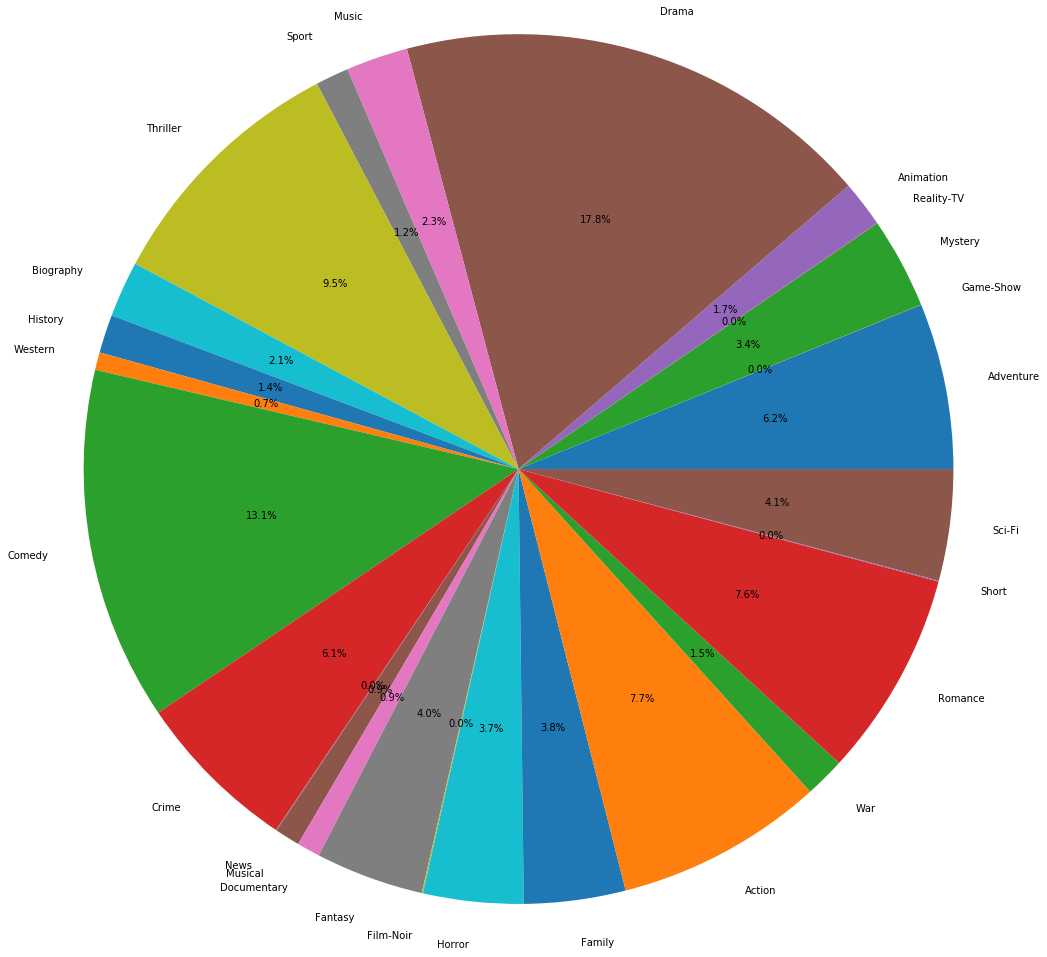

In [32]:
plt.pie(glist,labels=glist1,radius=5,autopct='%1.1f%%')
plt.show()

# Bar Plot

Text(0.5, 1.0, 'GENRE DISTRIBUTION')

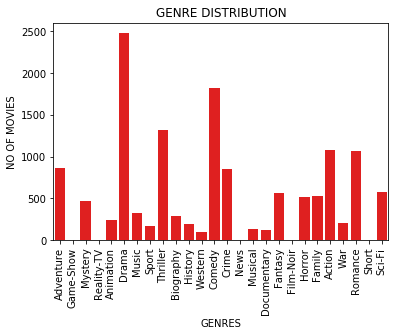

In [33]:
sns.barplot(glist1,glist,color='r')
plt.xticks(rotation=90)
plt.xlabel('GENRES')
plt.ylabel('NO OF MOVIES')
plt.title('GENRE DISTRIBUTION')


# Distplot for IMDB Rating

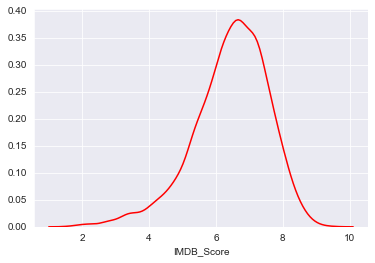

In [34]:
sns.set_style('darkgrid')
sns.distplot(dataset['IMDB_Score'],hist=False,color='r')

# Relation b/w IMDB Score and Reviews

In [26]:
b= dataset.groupby('IMDB_Score')['Reviews_by_Users','Reviews_by_Crtiics'].sum()

In [27]:
b

,Reviews_by_Users,Reviews_by_Crtiics
IMDB_Score,,
1.6,233.0,84.0
1.7,66.0,12.0
1.9,497.0,146.0
2.0,68.0,32.0
2.1,648.0,151.0
...,...,...
9.0,5490.0,848.0
9.1,38.0,55.0
9.2,2238.0,208.0


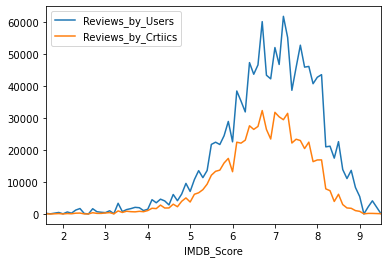

In [28]:
b.plot()

# LINEAR REGRESSION

In [120]:
ds_num=dataset.drop(labels=['Genres','Title'],axis='columns')
y=ds_num['IMDB_Score']
x=ds_num.drop(labels=['IMDB_Score'],axis='columns')

In [121]:
x

,Year,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,Short,Reality-TV,Sci-Fi,Action,...,Western,Comedy,History,Musical,Documentary,Game-Show,Biography,Crime,Fantasy,Sport
0,1916,123.0,385907.0,10718,88.0,69.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1920,110.0,100000.0,5,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1925,151.0,245000.0,4849,45.0,48.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1927,145.0,6000000.0,111841,413.0,260.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1929,110.0,20000000.0,7431,84.0,71.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,1956,103.0,20000000.0,9277,44.0,10.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5036,2012,30.0,20000000.0,7646,56.0,19.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5037,2005,103.0,20000000.0,726,6.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5038,2011,142.0,20000000.0,6053,33.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
y

0       8.0
1       4.8
2       8.3
3       8.3
4       8.0
       ... 
5035    8.2
5036    7.3
5037    7.1
5038    7.7
5039    7.0
Name: IMDB_Score, Length: 5040, dtype: float64

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [124]:
y_train

1087    6.8
545     6.5
2879    7.2
3637    6.1
4293    6.4
       ... 
4931    6.0
3264    6.4
1653    4.8
2607    6.4
2732    5.1
Name: IMDB_Score, Length: 4032, dtype: float64

In [125]:
x_train

,Year,Duration,Budget,User_votes,Reviews_by_Users,Reviews_by_Crtiics,Short,Reality-TV,Sci-Fi,Action,...,Western,Comedy,History,Musical,Documentary,Game-Show,Biography,Crime,Fantasy,Sport
1087,1998,106.0,3500000.0,1024,494.0,39.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
545,1989,90.0,10000000.0,4792,43.0,21.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2879,2007,124.0,61000000.0,256213,338.0,198.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3637,2010,101.0,19000000.0,77987,120.0,181.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4293,2013,105.0,27220000.0,43879,133.0,120.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2016,119.0,68005000.0,1212,9.0,14.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3264,2009,153.0,75000000.0,100837,301.0,230.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1653,2001,84.0,22000000.0,47383,132.0,75.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2607,2006,118.0,15000000.0,5772,115.0,75.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
y_pred = regressor.predict(x_test)

In [128]:
y_pred

array([6.95779364, 6.17030387, 6.9420539 , ..., 6.57357075, 6.42706112,
       5.70496734])

In [129]:
y_test-y_pred

2013    0.342206
1569   -1.270304
381    -0.442054
302    -0.209821
4210    1.487329
          ...   
1114    0.342446
2399    1.161272
1085   -0.373571
161    -0.127061
3600    0.495033
Name: IMDB_Score, Length: 1008, dtype: float64

## Accuracy on applying linear regression

In [131]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.707879258200948

# Decision Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x=a.iloc[:,:-1].values
y=a.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [134]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train,y_train)
y_dtc=dtc.predict(x_test)
accuracy_score(y_test,y_dtc)

0.8780487804878049

# Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=250)
rfc=rfc.fit(x_train,y_train)
y_rfc=rfc.predict(x_test)
accuracy_score(y_test,y_rfc)

0.8892276422764228

# Knighbors Classification

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=10)
knc=knc.fit(x_train,y_train)
y_knc=knc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_knc)

0.8841463414634146

# Logistic Regression

In [138]:
reg=LogisticRegression(solver='liblinear')
reg=reg.fit(x_train,y_train)
y_reg=reg.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_reg)

0.8780487804878049